# Telco Customer Churn KMeans

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# importing the dataset
o_data = pd.read_excel('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\KMeans\\Telco_customer_churn (1).xlsx')

In [3]:
data = o_data.copy()

In [4]:
# checking the features in the dataset
data.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [5]:
# Dimensions of the dataset
data.shape

(7043, 30)

In [6]:
# Checking for null values
data.isnull().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

There are no null values

In [7]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values

In [8]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [9]:
# Statistical Description
data.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


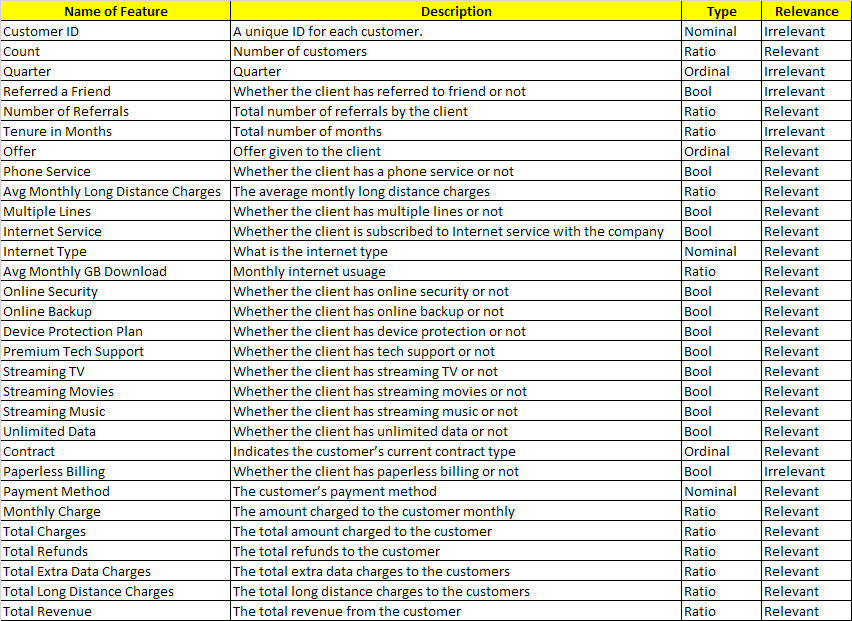

In [10]:
# Separating Numeric and Non numeric data
Num_data = pd.DataFrame([])
Cat_data = pd.DataFrame([])
for col in data.columns:
    if data[col].dtypes == 'O':
        Cat_data[col] = data[col]
    else:
        Num_data[col] = data[col]

# Handling Numerical Data

In [11]:
Num_data.head()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,1,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36


In [12]:
# Checking for unique values in each Numerical feature 
for col in Num_data.columns:
    y= Num_data[col].unique()
    x = len(Num_data[col].unique());print('{} : {} [{}]'.format(col,x,y))

Count : 1 [[1]]
Number of Referrals : 12 [[ 0  1  6  2  4  3  7  5  8  9 10 11]]
Tenure in Months : 72 [[ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]]
Avg Monthly Long Distance Charges : 3584 [[ 0.   48.85 11.33 ... 44.99 44.98  8.62]]
Avg Monthly GB Download : 50 [[ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46]]
Monthly Charge : 1585 [[39.65 80.65 95.45 ... 43.05 72.   78.7 ]]
Total Charges : 6540 [[  39.65  633.3  1752.55 ... 7362.9   346.45 6844.5 ]]
Total Refunds : 500 [[ 0.   45.61 13.43 40.95 11.05 29.84 49.57 12.07 40.64 10.2  17.88 37.55
 48.09 32.46 20.23 12.59 43.31  8.13 46.64 23.33 47.2  33.25 33.73 49.06
 25.79 15.24 26.99 44.58 20.16  8.88 12.48  6.79 39.29 44.31  5.49 25.67
  9.49 29.17 19.25 45.

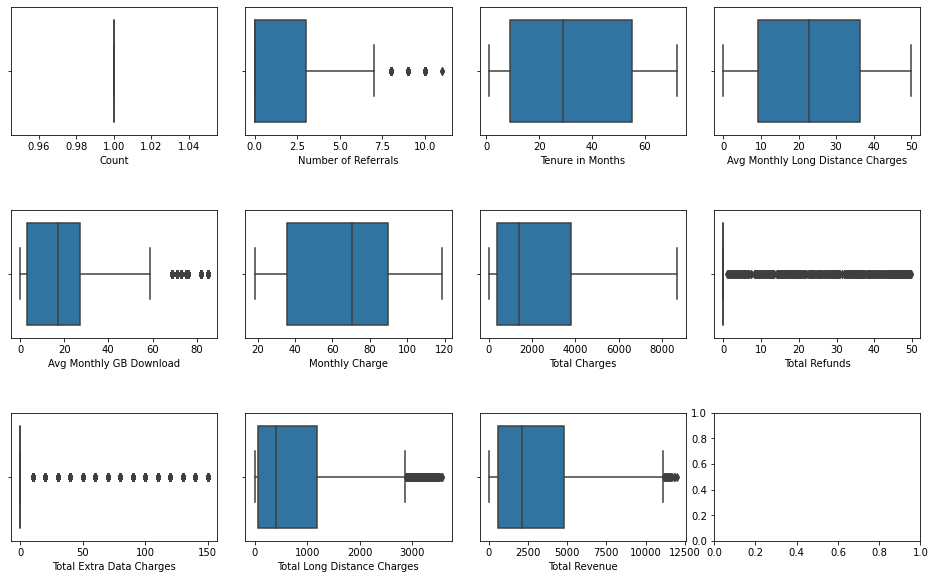

In [13]:
# Checking for outliers using boxplot

fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize=(13, 8))
index = 0
axs = axs.flatten()
data1 = Num_data.iloc[:,0:]
for k,v in data1.items():
    sns.boxplot(k,data = data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

In [14]:
# Importing Variance Threshold for Zero Variance

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.05)
vt_data = vt.fit(Num_data)
vt_data.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [15]:
data['Total Extra Data Charges'].value_counts()

0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: Total Extra Data Charges, dtype: int64

In [16]:
data['Total Refunds'].value_counts()

0.00     6518
46.06       2
9.73        2
32.55       2
27.60       2
         ... 
36.61       1
34.09       1
44.16       1
27.30       1
27.24       1
Name: Total Refunds, Length: 500, dtype: int64

In [17]:
# Winsorizing the outliers to retain the data from the outliers

for col in Num_data:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_end = data[col].quantile(0.75) + (1.5*IQR)
    low_end = data[col].quantile(0.25) - (1.5*IQR)
    if low_end < 0:
        low_end = 0
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))
    else:
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))        

In [18]:
# Dropping Zero Variance features
Num_data.drop(["Count","Total Refunds",'Total Extra Data Charges'], axis=1,inplace = True)

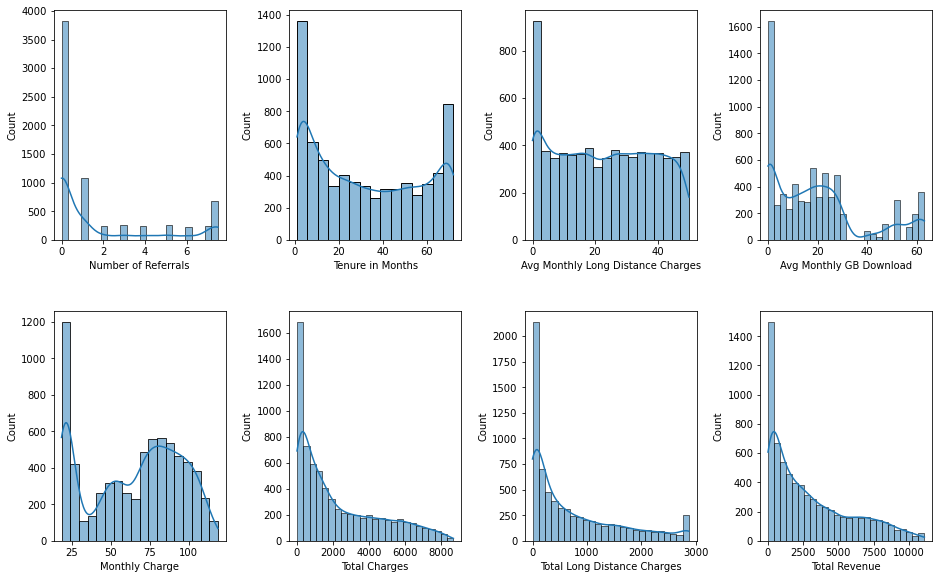

In [19]:
# Histplot

fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize=(13, 8))
index = 0
axs = axs.flatten()
data1 = Num_data.iloc[:,0:]
for k,v in data1.items():
    sns.histplot(x = data[k],ax=axs[index],kde=1)
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

It seems that all the features are right skewed. Most of the revenue is from very small amount of customers. 

<AxesSubplot:>

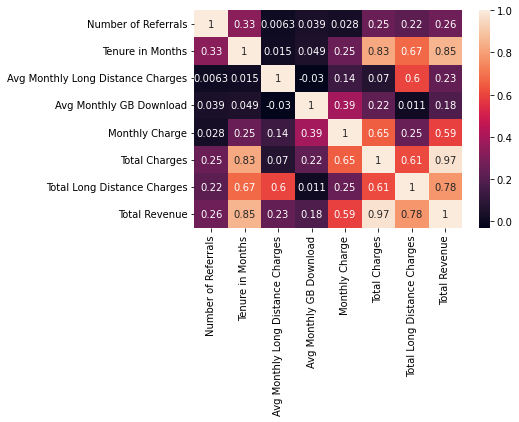

In [20]:
sns.heatmap(Num_data.corr(),annot=True)

<AxesSubplot:xlabel='Total Charges', ylabel='Total Revenue'>

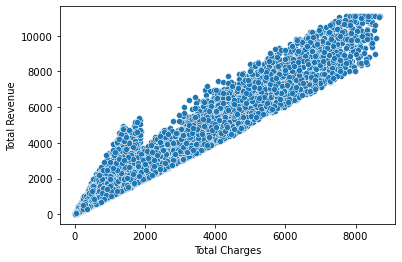

In [21]:
# Scatter plot between total revenue and total charges

sns.scatterplot(y = data['Total Revenue'], x = data['Total Charges'])

Total charges is highly related with total revenue. Also greater the tenure more will be the all the Charges.
Hence dropping total charges

In [22]:
Num_data.drop(['Total Charges'],axis =1, inplace = True)

In [23]:
Num_data.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Long Distance Charges,Total Revenue
0,0,1,0.00,8,39.65,0.00,59.65
1,1,8,48.85,17,80.65,390.80,1024.10
2,0,18,11.33,52,95.45,203.94,1910.88
3,1,25,19.76,12,98.50,494.00,2995.07
4,1,37,6.33,14,76.50,234.21,3102.36


<AxesSubplot:xlabel='Number of Referrals', ylabel='Total Revenue'>

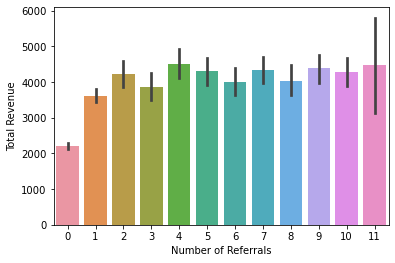

In [24]:
# Barplot between referrals and total revenue
sns.barplot(Num_data['Number of Referrals'],Num_data['Total Revenue'])

Increase in number of referrals did not relatively increase the total revenue. It is almost constant after 4 referrals.

<AxesSubplot:xlabel='Monthly Charge', ylabel='Total Revenue'>

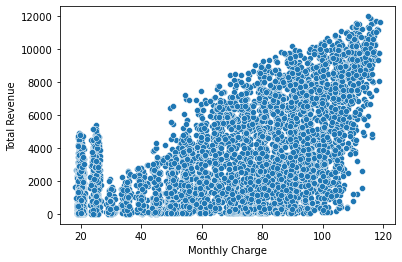

In [25]:
# Scatterplot between Monthly Charge and Total Revenue
sns.scatterplot(Num_data['Monthly Charge'], Num_data['Total Revenue'])

# Categorical Data

In [26]:
Cat_data.head()

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,8779-QRDMV,Q3,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,7495-OOKFY,Q3,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,1658-BYGOY,Q3,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [27]:
# Checking for unique values in each Numerical feature 
for col in Cat_data.columns:
    y= Cat_data[col].unique()
    x = len(Cat_data[col].unique());print('{} : {} [{}]'.format(col,x,y))

Customer ID : 7043 [['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']]
Quarter : 1 [['Q3']]
Referred a Friend : 2 [['No' 'Yes']]
Offer : 6 [['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']]
Phone Service : 2 [['No' 'Yes']]
Multiple Lines : 2 [['No' 'Yes']]
Internet Service : 2 [['Yes' 'No']]
Internet Type : 4 [['DSL' 'Fiber Optic' 'Cable' 'None']]
Online Security : 2 [['No' 'Yes']]
Online Backup : 2 [['No' 'Yes']]
Device Protection Plan : 2 [['Yes' 'No']]
Premium Tech Support : 2 [['No' 'Yes']]
Streaming TV : 2 [['No' 'Yes']]
Streaming Movies : 2 [['Yes' 'No']]
Streaming Music : 2 [['No' 'Yes']]
Unlimited Data : 2 [['No' 'Yes']]
Contract : 3 [['Month-to-Month' 'One Year' 'Two Year']]
Paperless Billing : 2 [['Yes' 'No']]
Payment Method : 3 [['Bank Withdrawal' 'Credit Card' 'Mailed Check']]


In [28]:
# Dropping Irrelevant data
Cat_data.drop(['Customer ID','Quarter','Referred a Friend','Paperless Billing'], axis = 1, inplace = True)

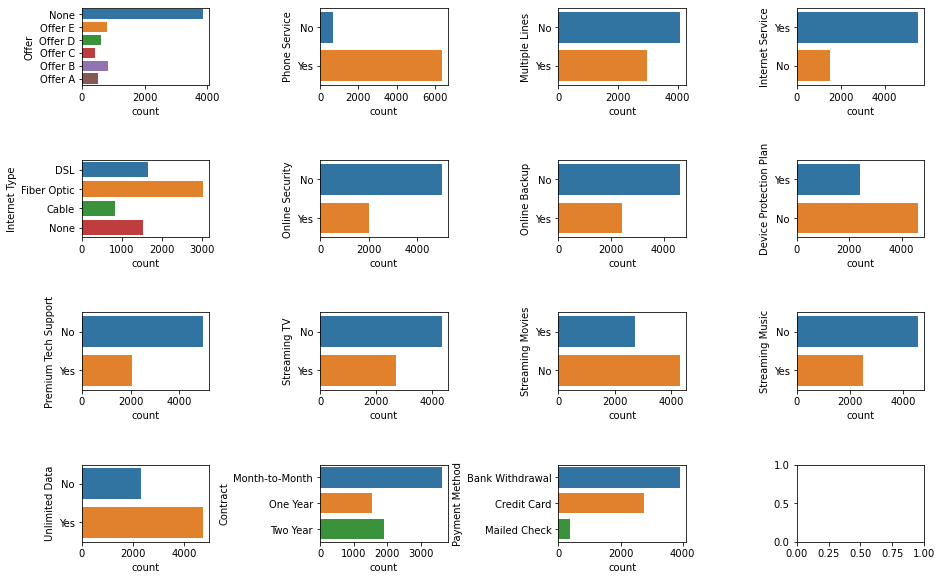

In [29]:
# Countplots for categorical data

fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize=(13, 8))
index = 0
axs = axs.flatten()
data1 = Cat_data.iloc[:,0:]

for k,v in data1.items():
    sns.countplot(y = Cat_data[k],ax=axs[index]);
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

Observations:
1. Majority of customers use Fibre optics.
2. Customers are not buying offers.
3. Month to month subscriptions are the most, so customers 
4. Customers have opted for internet and phone services.
5. Trying to sell other services to customers must be preferred which includes online security, online backup, device protection plan, premium tech support.
6. Offers or combos with unlimited data should include streaming tv, music and movies. 

In [30]:
# Converting Categorical data into numerical
Cat_dummies = pd.get_dummies(Cat_data,drop_first=True)
Cat_dummies.head()

,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,...,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,1,1,1,0,1,...,0,0,1,1,1,1,0,0,0,0
3,0,0,1,0,0,1,0,1,0,1,...,1,0,1,1,0,1,0,0,0,0
4,0,0,1,0,0,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [31]:
# JOining categorical dummies and numerical data
New_data = pd.concat([Num_data,Cat_dummies],axis=1)
New_data

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Long Distance Charges,Total Revenue,Offer_Offer A,Offer_Offer B,Offer_Offer C,...,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,1,0.00,8,39.65,0.00,59.65,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1,8,48.85,17,80.65,390.80,1024.10,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,18,11.33,52,95.45,203.94,1910.88,0,0,0,...,0,0,1,1,1,1,0,0,0,0
3,1,25,19.76,12,98.50,494.00,2995.07,0,0,1,...,1,0,1,1,0,1,0,0,0,0
4,1,37,6.33,14,76.50,234.21,3102.36,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.15,1639.44,3039.53,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7039,1,24,36.05,24,84.80,865.20,2807.47,0,0,1,...,1,1,1,1,1,1,1,0,0,1
7040,4,72,29.66,59,103.20,2135.52,9453.04,0,0,0,...,1,0,1,1,1,1,1,0,1,0
7041,1,11,0.00,17,29.60,0.00,319.21,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = pd.DataFrame(sc.fit_transform(New_data),columns = New_data.columns)

In [33]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
norm_data = pd.DataFrame(mm.fit_transform(New_data),columns = New_data.columns)

# KMeans Clustering 

In [34]:
# K-Means Clustering to check for number of clusters on standardised dataset
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

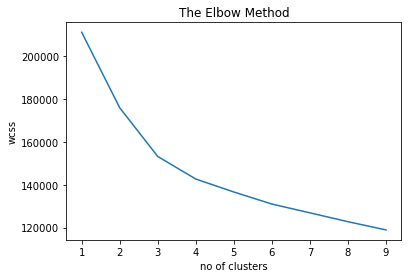

In [35]:
# Visualizing the Elbow method to get the optimal value of K value

plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [36]:
# K-Means Clustering to check for number of clusters on normalized dataset
from sklearn.cluster import KMeans

wcss2=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(norm_data)
    wcss2.append(kmeans.inertia_)

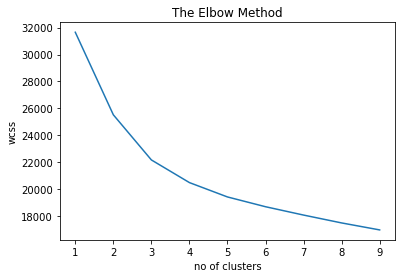

In [37]:
# Visualizing the Elbow method to get the optimal value of K value

plt.plot(range(1,10), wcss2)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [38]:
# Checking silhoeutte score for normalized and standardized data

from sklearn.metrics import silhouette_score
print('\nFor Standardized data')
for cluster in range(2,5):
    temp = KMeans(n_clusters = cluster, init='k-means++', random_state=0)
    cluster_labels = temp.fit_predict(std_data)
    s_score = silhouette_score(std_data,cluster_labels)
    print('For {} clusters silhouette score is {}.'.format(cluster,s_score))

print('\nFor Normalized data')
for cluster in range(2,5):
    temp = KMeans(n_clusters = cluster, init='k-means++', random_state=0)
    cluster_labels = temp.fit_predict(norm_data)
    s_score = silhouette_score(norm_data,cluster_labels)
    print('For {} clusters silhouette score is {}.'.format(cluster,s_score))


For Standardized data
For 2 clusters silhouette score is 0.17841949915458843.
For 3 clusters silhouette score is 0.16983403857471346.
For 4 clusters silhouette score is 0.17929296934883265.

For Normalized data
For 2 clusters silhouette score is 0.19694776978632433.
For 3 clusters silhouette score is 0.1781887332655506.
For 4 clusters silhouette score is 0.18071936538528358.


    Using normalized dataset with 4 cluster 

In [39]:
# Predicting clusters using Kmeans

kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
cluster_labels = kmeansmodel.fit_predict(norm_data)

In [40]:
# Adding cluster labels to dataset

New_data['cluster_labels'] = pd.DataFrame(cluster_labels) 

<AxesSubplot:xlabel='cluster_labels', ylabel='count'>

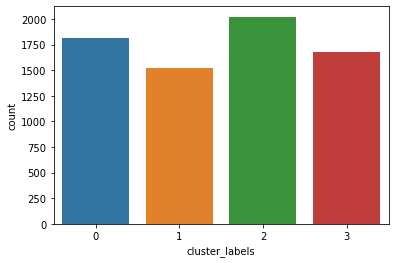

In [41]:
# Countplot of the clusters
sns.countplot(New_data.cluster_labels)

Majority of data belongs to Cluster 2 and least to cluster 1

In [42]:
# Adding cluster labels to original dataset

o_data['cluster_labels'] = pd.DataFrame(cluster_labels) 

<AxesSubplot:xlabel='Tenure in Months', ylabel='Total Revenue'>

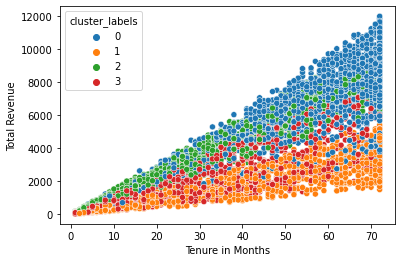

In [43]:
sns.scatterplot(y = o_data['Total Revenue'], x = o_data['Tenure in Months'], hue = o_data.cluster_labels, palette= 'tab10')

In [44]:
o_data.iloc[:, 0:].groupby(o_data.cluster_labels).mean()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster_labels
cluster_labels,,,,,,,,,,,,
0,1.0,3.031422,56.445424,24.426974,27.678611,93.225717,5277.957304,2.025739,10.463065,1370.327889,6656.722519,0.0
1,1.0,2.177472,30.604453,24.972443,0.016372,21.094270,664.608703,1.652862,0.098232,770.587204,1433.641277,1.0
2,1.0,1.113749,19.387735,25.560490,23.709693,83.887290,1664.995598,2.219120,7.388724,494.743447,2164.908650,2.0
3,1.0,1.589881,23.674405,16.412589,27.568452,50.698869,1252.995298,1.865464,8.482143,364.924643,1624.536619,3.0


As tenure increases avg monthly long distance charges,Monthly Charge,Avg Monthly GB Downloads, Total Charges, Total Long Distance Charges and Total Revenue increases. Total Extra Data Charges and Total Refunds does not depend on any features.

Cluster 0 represents customers who have referred the most generating the highest revenues and longest duration. These are loyal customers.

Cluster 1 represents group of customers who have been for good tenure and least total revenues. These are the customers who are likely to churn.

Cluster 2 represents customers with least tenures and good revenue and least referrals. These are the customers to be more focused on. 

Cluster 3 represents group of customers with less Total Revenues and less tenure.